In [68]:
### identifying wrong text and correcting it using textblob
from textblob import TextBlob
incorrect_text="thfge mavvn wkho is standikkng that was an elephantt"
textBlb=TextBlob(incorrect_text)
print("correct text:",textBlb.correct().string)

correct text: the man who is standing that was an elephant


In [69]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
sentences=['i love coding','i love python','coding is fun']
words=[sentence.split() for sentence in sentences]
vocabulary=sorted(set(word for sentence in words for word in sentence))
encoder=OneHotEncoder(sparse_output=False)
encoder.fit(np.array(vocabulary).reshape(-1,1))
encoded_sentences=[]
for sentence in words:
  encoded=encoder.transform(np.array(sentence).reshape(-1,1))
  encoded_sentences.append(encoded)
#print(encoded_sentences)
print("vacabulary: ",vocabulary)
for i,sentence in enumerate(encoded_sentences):
  print(f"Sentences:\n' {sentence}'")
  print("One Hot Encoding:\n",encoded_sentences[i])

vacabulary:  ['coding', 'fun', 'i', 'is', 'love', 'python']
Sentences:
' [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]'
One Hot Encoding:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]
Sentences:
' [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]'
One Hot Encoding:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
Sentences:
' [[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]'
One Hot Encoding:
 [[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [70]:
#### Bag-of-words

from sklearn.feature_extraction.text import CountVectorizer
document=["I love python programming",
          "Python programming is fun",
          "I do not love the bugs in the code"]

vectorizer=CountVectorizer()
bow_matrix=vectorizer.fit_transform(document) #### Training the data to vectorizer

vocabulary=vectorizer.get_feature_names_out()  ### gives all the unique fearures
print("Vocabulary:\n",vocabulary)
print("Bag of Words Matrix:\n",bow_matrix.toarray())


Vocabulary:
 ['bugs' 'code' 'do' 'fun' 'in' 'is' 'love' 'not' 'programming' 'python'
 'the']
Bag of Words Matrix:
 [[0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 1 0 0 1 1 0]
 [1 1 1 0 1 0 1 1 0 0 2]]


In [71]:
### TF-IDF
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(document)
df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
print(df.head())




       bugs      code        do       fun        in        is      love  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.577350   
1  0.000000  0.000000  0.000000  0.562829  0.000000  0.562829  0.000000   
2  0.323112  0.323112  0.323112  0.000000  0.323112  0.000000  0.245735   

        not  programming    python       the  
0  0.000000     0.577350  0.577350  0.000000  
1  0.000000     0.428046  0.428046  0.000000  
2  0.323112     0.000000  0.000000  0.646225  


In [72]:
# Find verbs and nouns in a given sentence

In [73]:
### TF-IDF
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Instead of X, use bow_matrix from the previous cell
vectorizer = TfidfVectorizer()
# Fit the vectorizer to the same documents used for bow_matrix
vectorizer.fit(document)  # Assuming 'document' is still in scope

# Transform the documents using TF-IDF
tfidf_matrix = vectorizer.transform(document)

# Create the DataFrame using tfidf_matrix
df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(df.head())

       bugs      code        do       fun        in        is      love  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.577350   
1  0.000000  0.000000  0.000000  0.562829  0.000000  0.562829  0.000000   
2  0.323112  0.323112  0.323112  0.000000  0.323112  0.000000  0.245735   

        not  programming    python       the  
0  0.000000     0.577350  0.577350  0.000000  
1  0.000000     0.428046  0.428046  0.000000  
2  0.323112     0.000000  0.000000  0.646225  


In [74]:
import spacy

nlp = spacy.load("en_core_web_sm")
sentence = "The quick brown fox jumps over the lazy dog."
doc = nlp(sentence)

nouns = [token.text for token in doc if token.pos_ == 'NOUN']
verbs = [token.text for token in doc if token.pos_ == 'VERB']

print("Nouns:", nouns)
print("Verbs:", verbs)



Nouns: ['fox', 'dog']
Verbs: ['jumps']


In [75]:
!python -m textblob.download_corpora
# or
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [76]:
##### Saturday 18-01-2025

In [77]:
### NLP gram

from nltk import ngrams
from collections import Counter
sentence="I love python soo much"
text=sentence.split()
print(text)

### Creating a function

def n_gram(text,n):
  n_grams=ngrams(text,n)
  return [" ".join(grams) for grams in n_grams]



['I', 'love', 'python', 'soo', 'much']


In [78]:
n=1
unigrams=n_gram(text,1)
print(unigrams)
"""bigrams=n_gram(text,2)
print(bigrams)
trigrams=n_gram(text,3)
print(trigrams)
quagrams=n_gram(text,4)
print(quadgrams)"""

['I', 'love', 'python', 'soo', 'much']


'bigrams=n_gram(text,2)\nprint(bigrams)\ntrigrams=n_gram(text,3)\nprint(trigrams)\nquagrams=n_gram(text,4)\nprint(quadgrams)'

In [79]:
'''unigrams=n_gram(text,1)
print(unigrams)'''
n=2
bigrams=n_gram(text,2)
print(bigrams)
'''trigrams=n_gram(text,3)
print(trigrams)
quagrams=n_gram(text,4)
print(quadgrams)'''


['I love', 'love python', 'python soo', 'soo much']


'trigrams=n_gram(text,3)\nprint(trigrams)\nquagrams=n_gram(text,4)\nprint(quadgrams)'

In [80]:
'''unigrams=n_gram(text,1)
print(unigrams)
bigrams=n_gram(text,2)
print(bigrams)'''
n=3
trigrams=n_gram(text,3)
print(trigrams)
'''quagrams=n_gram(text,4)
print(quadgrams)'''

['I love python', 'love python soo', 'python soo much']


'quagrams=n_gram(text,4)\nprint(quadgrams)'

In [81]:
''''unigrams=n_gram(text,1)
print(unigrams)
bigrams=n_gram(text,2)
print(bigrams)
trigrams=n_gram(text,3)
print(trigrams)'''
n=4
quadgrams=n_gram(text,4)
print(quadgrams)

['I love python soo', 'love python soo much']


In [82]:
n=5
punchgrams=n_gram(text,5)
print(punchgrams)

['I love python soo much']


In [83]:
!pip install gensim


In [84]:
corpus=[
    "Ask not what your country can do for you.",
    "Change your thoughts and you change your world.",
    "Success is the sum of small efforts, repeated day in and day out.",
    "It always seems impossible until it's done.",
    "All litters are not gold."
]

In [85]:
corpus = [
    "The quick brown cat jumps over the lazy dog",
    "A journey of a thousand miles begins with a single step",
    "To be or not to be that is the question",
    "All that glitters is not gold",
    "The early bird catches the worm"
]

In [86]:
tokenize_sentence=[sentence.lower().split() for sentence in corpus]
print(tokenize_sentence)

[['the', 'quick', 'brown', 'cat', 'jumps', 'over', 'the', 'lazy', 'dog'], ['a', 'journey', 'of', 'a', 'thousand', 'miles', 'begins', 'with', 'a', 'single', 'step'], ['to', 'be', 'or', 'not', 'to', 'be', 'that', 'is', 'the', 'question'], ['all', 'that', 'glitters', 'is', 'not', 'gold'], ['the', 'early', 'bird', 'catches', 'the', 'worm']]


In [87]:
import gensim
from gensim.models import Word2Vec
model=Word2Vec(tokenize_sentence,min_count=1,vector_size=50,window=5,sg=0)
model.save("Word2Vec.model")

In [88]:
import gensim
from gensim.models import Word2Vec # Changed word2Vec to Word2Vec
model=Word2Vec(tokenize_sentence,min_count=1,vector_size=50,window=5,sg=0) # Changed word2Vec to Word2Vec
model.save("word2Vec.model")

In [89]:
vector=model.wv["cat"]
print(vector)

[ 1.6265802e-02 -8.9166770e-03 -2.1474273e-03  2.0087818e-03
 -3.8085945e-04  2.2845797e-03  1.2229419e-02 -3.9210954e-05
 -6.4889290e-03 -3.0246107e-03  1.1792165e-02  3.0216638e-03
 -1.4416290e-03  1.8664461e-02 -9.8503446e-03 -1.6686678e-03
  1.8349672e-02  1.3495063e-02  3.0006764e-03 -1.7775077e-02
  2.3031184e-03 -4.5672455e-03  1.8736541e-02  2.4200890e-03
  2.9817792e-03  4.8100217e-03 -3.6664247e-03 -9.9993451e-03
  4.5864380e-04 -4.0283133e-03  1.3202277e-02  1.7885761e-02
 -1.3438723e-03  5.9647011e-03 -1.2226269e-02  3.3990385e-03
 -1.3842322e-02 -1.7388793e-02 -1.1804348e-02 -1.7911090e-02
  1.4557923e-02 -1.1541561e-02  1.6557282e-02 -1.4487328e-02
  6.8516233e-03  1.9355772e-02 -1.5566316e-02 -1.9894745e-02
 -8.6559411e-03 -5.3599351e-03]


In [90]:
similarities = model.wv.most_similar("cat")
for word,similarity in similarities:
    print(f"{word}: {similarity}")



to: 0.18995018303394318
quick: 0.18860775232315063
dog: 0.17439205944538116
or: 0.1423332542181015
lazy: 0.11533424258232117
not: 0.10170882195234299
a: 0.08100420236587524
all: 0.07590492814779282
the: 0.040798820555210114
early: 0.036736130714416504


In [91]:
print("I going to MRU college to study NLP and they are soo good")

I going to MRU college to study NLP and they are soo good


In [92]:
import re
pattern = r"\d+"
text = "oo7 is the code names for Mr.Bond"
output = re.search(pattern, text)  # Changed re.match to re.search
if output:  # Check if a match was found
    print(output.group())
else:
    print("No match found.")

7


In [93]:
import re
pattern = r"\d+"
text = "007 is the code names for Mr.Bond"
output = re.match(pattern, text)  # Changed re.match to re.search
if output:  # Check if a match was found
    print(output.group())
else:
    print("No match found.")

007


In [94]:
import re
pattern = r"\w+"
text = "hlo 007 is the code names for Mr.Bond"
output = re.match(pattern, text)  # Changed re.match to re.search
if output:  # Check if a match was found
    print(output.group())
else:
    print("No match found.")

hlo


In [95]:
import re
pattern=r"\w+"
text = "hehy 007 is the code names for Mr.Bond"
output_pattern = re.match(pattern, text)  # Changed re.match to re.search
if output_pattern:  # Check if a match was found
    print(output_pattern.group())
else:
    print("No match found.")

hehy


In [96]:
import re
pattern=r"\d+"
text = "hehy 009 is the code names 008 for Mr.Bond"
output_pattern = re.search(pattern, text)  # Changed re.match to re.search
if output_pattern:  # Check if a match was found
    print(output_pattern.group())
else:
    print("No match found.")

009


In [97]:
import re
pattern=r"\d+"
text="hehy 007 is the code names 008 for Mr.Bond"
output_pattern=re.findall(pattern,text)
print(output_pattern)

['007', '008']


In [98]:
### There is a text with hashtags,mails and digits and i want to extract those words using NLP

In [99]:
mails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)

In [100]:
import re
pattern=r"\d+"
text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
output=re.findall(pattern,text)
print(output)

['123', '1234']


In [101]:
import re
pattern=r"#\w+"
text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
output=re.findall(pattern,text)
print(output)

['#AI', '#MachineLearning']


In [102]:
import re
#pattern=r"\w+"
text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
mails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)
print(mails)

['info@example.com', 'support123@company.org']


In [103]:
import re
#pattern=r"\w+"
text = """
Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
mails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)
print(mails)

['info@example.com', 'support123@company.org']


In [104]:
"""roblem: NLP Text Cleaning and Extraction You are tasked with cleaning a text dataset to prepare it for NLP tasks.
 Your goal is to:Extract all email addresses from the text. Remove all numbers (to prevent numeric features from
 skewing the NLP analysis). Extract all hashtags (for sentiment analysis and trending topics).
 Normalize whitespace to ensure there's no extra spaces between words. Remove any HTML
 tags that may be included in the text (from web scraping)."""

"roblem: NLP Text Cleaning and Extraction You are tasked with cleaning a text dataset to prepare it for NLP tasks.\n Your goal is to:Extract all email addresses from the text. Remove all numbers (to prevent numeric features from\n skewing the NLP analysis). Extract all hashtags (for sentiment analysis and trending topics).\n Normalize whitespace to ensure there's no extra spaces between words. Remove any HTML\n tags that may be included in the text (from web scraping)."

In [105]:
import re
def extract_all(text):
    emails = re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', text)
    hashtags = re.findall(r'#\w+', text)
    numbers = re.findall(r'\d+', text)
    clean_text = re.sub(r'\w+',' ', text)
    return emails, hashtags, numbers, clean_text
text = """
Hello world! Contact us at info@example.com or support123@company.org Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
emails, hashtags, numbers, clean_text = extract_all(text)
print("Emails:", emails)
print("Hashtags:", hashtags)
print("Numbers:", numbers)
print("Cleaned Text:", clean_text)

Emails: ['info@example.com', 'support123@company.org']
Hashtags: ['#AI', '#MachineLearning']
Numbers: ['123', '1234']
Cleaned Text: 
   !        @ .     @ .           : #  # .
  <   =" :// . ">   </ >      .              .



In [106]:
import re
text = """
Hello world! Contact us at info@example.com or support123@company.org Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
emails=re.findall(r'[a-zA-Z0-9_%-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{3,}',text)
print(emails)

['info@example.com', 'support123@company.org']


In [107]:
hash=re.findall(r'#\w+',text)
print(hash)

['#AI', '#MachineLearning']


In [108]:
numbers=re.findall(r'\d+',text)
print(numbers)

['123', '1234']


In [109]:
import re
def extract_all(text):
    emails=re.findall(r'[a-zA-Z0-9._%]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}',text)
    number=re.findall(r'\d+',text)
    hash=re.findall(r'#\w+',text)
    clean_text=re.sub(r'\d+','',text)
    return emails,number,hash,clean_text
text = """
Hello world! Contact us at info@example.com or support123@company.org Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
emails,number,hash,clean_text=extract_all(text)
print(emails)
print(number)
print(hash)
print(clean_text)

['info@example.com', 'support123@company.org']
['123', '1234']
['#AI', '#MachineLearning']

Hello world! Contact us at info@example.com or support@company.org Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number .



In [110]:
clean_text1=re.sub(r'\d+',' ',text)
clean_text=re.sub(r'<.*?>',' ',text)
print(clean_text)
print(clean_text1)


Hello world! Contact us at info@example.com or support123@company.org Follow us on social media: #AI #MachineLearning.
Visit  our website  for more details. This is a test with number 1234.


Hello world! Contact us at info@example.com or support @company.org Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number  .



In [111]:
!pip install wordcloud

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [113]:
import pandas as pd
dataset = pd.read_csv("/content/23_1ExceLR_Dataset.csv", encoding='ISO-8859-1')
print(dataset.head(3))

   Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   

   replyToSID            id  replyToUID  \
0         NaN  8.014957e+17         NaN   
1         NaN  8.014957e+17         NaN   
2         NaN  8.014955e+17         NaN   

                                        statusSource       screenName  \
0  <a href="http://twitter.com/download/android" ...  HASHTAGFARZIWAL   
1  <a href="http://twitter.com/download/android" ...   PRAMODKAUSHIK9   
2  <a href="http://twitter.com

In [114]:
dataset.shape

(14940, 16)

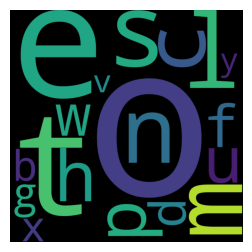

In [115]:
import re

def clean_text(text):
  if isinstance(text, list):  # Check if text is a list
    text = ' '.join(text)  # Join the list elements into a single string
  text = re.sub(r'RT', '', text)
  text = re.sub(r'@amp', '', text)
  text = re.sub(r'[.?!:;#@%-]', '', text)
  text = text.lower()
  return text

# Assuming your list is named 'text_list'
Cleaned_text = clean_text(' '.join(text)) # Join list elements with space as delimiter

# ... rest of your code ...Cleaned_text=clean_text(text)
wc=WordCloud(width=800,height=800,max_words=200,background_color='black').generate(Cleaned_text)
plt.figure(figsize=(3,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [116]:
def gen_freq(text):
  word_list=[]
  for tw_words in text.split():
    word_list.extend(tw_words)
  word_freq=pd.Series(word_list).value_counts()
  word_freq[:10]
  return word_freq
word_freq=gen_freq(dataset.text.str)
print(word_freq)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Name: count, Length: 19601, dtype: int64


In [117]:
!pip install wordcloud

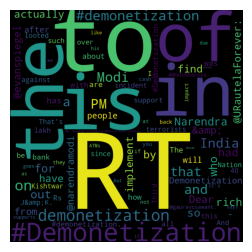

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,max_words=200,background_color='black').generate_from_frequencies(word_freq)
plt.figure(figsize=(3,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [119]:
import re
def clean_text(text):
  text=re.sub(r'RT','',text)
  text=re.sub(r'@amp','',text)
  text=re.sub(r'[.?!:;#@%-]','',text)
  text=text.lower()
  return text



In [120]:
#### POS Tagging

In [121]:
import pandas as pd
text=['Sarah lives in hut village','She has apple tree at her backyard','the apples are red in clour']
df=pd.DataFrame(text,columns=['Sentence'])
print(df)

                             Sentence
0          Sarah lives in hut village
1  She has apple tree at her backyard
2         the apples are red in clour


In [122]:
!pip install spacy

In [123]:
import spacy
nlp=spacy.load('en_core_web_sm')
token=[]
pos=[]
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation("DEP"):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])
df['Token']=token
df['POS']=pos
print(df)

                             Sentence  \
0          Sarah lives in hut village   
1  She has apple tree at her backyard   
2         the apples are red in clour   

                                        Token  \
0            [Sarah, lives, in, hut, village]   
1  [She, has, apple, tree, at, her, backyard]   
2          [the, apples, are, red, in, clour]   

                                         POS  
0            [PROPN, VERB, ADP, PROPN, NOUN]  
1  [PRON, VERB, NOUN, NOUN, ADP, PRON, NOUN]  
2           [DET, NOUN, AUX, ADJ, ADP, NOUN]  


In [124]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [125]:
pos

[['PROPN', 'VERB', 'ADP', 'PROPN', 'NOUN'],
 ['PRON', 'VERB', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN']]

In [126]:
token

[['Sarah', 'lives', 'in', 'hut', 'village'],
 ['She', 'has', 'apple', 'tree', 'at', 'her', 'backyard'],
 ['the', 'apples', 'are', 'red', 'in', 'clour']]

In [127]:
df.head()

,Sentence,Token,POS
0,Sarah lives in hut village,"[Sarah, lives, in, hut, village]","[PROPN, VERB, ADP, PROPN, NOUN]"
1,She has apple tree at her backyard,"[She, has, apple, tree, at, her, backyard]","[PRON, VERB, NOUN, NOUN, ADP, PRON, NOUN]"
2,the apples are red in clour,"[the, apples, are, red, in, clour]","[DET, NOUN, AUX, ADJ, ADP, NOUN]"


In [128]:
df.tail()

,Sentence,Token,POS
0,Sarah lives in hut village,"[Sarah, lives, in, hut, village]","[PROPN, VERB, ADP, PROPN, NOUN]"
1,She has apple tree at her backyard,"[She, has, apple, tree, at, her, backyard]","[PRON, VERB, NOUN, NOUN, ADP, PRON, NOUN]"
2,the apples are red in clour,"[the, apples, are, red, in, clour]","[DET, NOUN, AUX, ADJ, ADP, NOUN]"


In [129]:
df['noun']=df.apply(lambda x: x['POS'].count('NOUN'),axis=1)
df['verb']=df.apply(lambda x: x['POS'].count('VERB'),axis=1)
df['adj']=df.apply(lambda x: x['POS'].count('ADJ'),axis=1)
df['punct']=df.apply(lambda x: x['POS'].count('PUNCT'),axis=1)
#df['adv']=df.apply(lambda x: x['POS'].count('ADV'),axis=1)
#df['pron']=df.apply(lambda x: x['POS'].count('PRON'),axis=1)
df

,Sentence,Token,POS,noun,verb,adj,punct
0,Sarah lives in hut village,"[Sarah, lives, in, hut, village]","[PROPN, VERB, ADP, PROPN, NOUN]",1,1,0,0
1,She has apple tree at her backyard,"[She, has, apple, tree, at, her, backyard]","[PRON, VERB, NOUN, NOUN, ADP, PRON, NOUN]",3,1,0,0
2,the apples are red in clour,"[the, apples, are, red, in, clour]","[DET, NOUN, AUX, ADJ, ADP, NOUN]",2,0,1,0


In [130]:
text="I love NLP and I'll learn NLP in 2 months"

In [131]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [132]:
### Exploring Data Analysis(EDA) of Textual data:

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [134]:
df=pd.read_csv('/content/tripadvisor_hotel_reviews (1).csv')
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


In [135]:
def ratings(rating):
  if rating>3 and rating<=5:
    return "negative"
  elif rating>0 and rating<=3:
    return "positive"
  else:
    return "neutral"
df['sentiment']=df['Rating'].apply(ratings)
df.head()

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,negative
1,ok nothing special charge diamond member hilto...,2,positive
2,nice rooms not 4* experience hotel monaco seat...,3,positive
3,"unique, great stay, wonderful time hotel monac...",5,negative
4,"great stay great stay, went seahawk game aweso...",5,negative


In [136]:
df['Rating']=df['Rating'].apply(ratings)

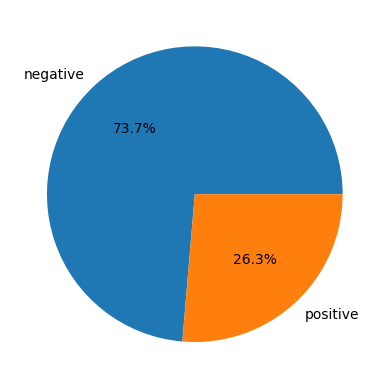

In [137]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [138]:
lenght=len(df['Rating'][0])
print(lenght)

8


In [139]:
word_count=df['Review'][0].split()
print(len(word_count))
#en(word_count)

87


In [140]:
def word_count(review):
  review_list=review.split()
  return len(review_list)
df['word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,sentiment,word_count
0,nice hotel expensive parking got good deal sta...,negative,negative,87
1,ok nothing special charge diamond member hilto...,positive,positive,250
2,nice rooms not 4* experience hotel monaco seat...,positive,positive,217
3,"unique, great stay, wonderful time hotel monac...",negative,negative,89
4,"great stay great stay, went seahawk game aweso...",negative,negative,191


In [141]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

# Your existing code:
import pandas as pd
import numpy as np
from nltk import tokenize
from nltk.tokenize import sent_tokenize  # Explicitly import sent_tokenize

df['mean_word_length'] = df['Review'].apply(
    lambda rev: np.mean(
        [len(word) for sent in sent_tokenize(rev) for word in sent.split()]
    )
)
print(df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              Review    Rating sentiment  \
0  nice hotel expensive parking got good deal sta...  negative  negative   
1  ok nothing special charge diamond member hilto...  positive  positive   
2  nice rooms not 4* experience hotel monaco seat...  positive  positive   
3  unique, great stay, wonderful time hotel monac...  negative  negative   
4  great stay great stay, went seahawk game aweso...  negative  negative   

   word_count  mean_word_length  
0          87          5.804598  
1         250          5.752000  
2         217          5.571429  
3          89          5.730337  
4         191          5.701571  


In [142]:
from nltk import tokenize
np.mean([len(sent) for sent in sent_tokenize(df['Review'][0])])

591.0

In [143]:
df['mean_sent_length']=df['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head()

,Review,Rating,sentiment,word_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,negative,negative,87,5.804598,591.0
1,ok nothing special charge diamond member hilto...,positive,positive,250,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,positive,positive,217,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",negative,negative,89,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",negative,negative,191,5.701571,1279.0


In [144]:
features=df.columns.tolist() [2:]
df=df.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,negative
1,ok nothing special charge diamond member hilto...,positive
2,nice rooms not 4* experience hotel monaco seat...,positive
3,"unique, great stay, wonderful time hotel monac...",negative
4,"great stay great stay, went seahawk game aweso...",negative


In [145]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  stop_words = set(stopwords.words('english'))
  review = "".join([word for word in review.split() if word not in stop_words])
  return review

df['Review'] = df['Review'].apply(clean)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Rating
0,nicehotelexpensiveparkinggotgooddealstayhotela...,negative
1,oknothingspecialchargediamondmemberhiltondecid...,positive
2,nicerooms4experiencehotelmonacoseattlegoodhote...,positive
3,uniquegreatstaywonderfultimehotelmonacolocatio...,negative
4,greatstaygreatstaywentseahawkgameawesomedownfa...,negative


In [146]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # Download stopwords if you haven't already

def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  # Load stopwords list from NLTK corpus
  stop_words = set(stopwords.words('english'))
  review = "".join([word for word in review.split() if word not in stop_words])
  return review

df['Review'] = df['Review'].apply(clean)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating
0,nicehotelexpensiveparkinggotgooddealstayhotela...,negative
1,oknothingspecialchargediamondmemberhiltondecid...,positive
2,nicerooms4experiencehotelmonacoseattlegoodhote...,positive
3,uniquegreatstaywonderfultimehotelmonacolocatio...,negative
4,greatstaygreatstaywentseahawkgameawesomedownfa...,negative


In [147]:
def family_names(text):
  text=['Chandranna Boya','Gangamma','Akhila','Supriya','Sudha','Prabha','Yashwanth Boya','Charan Boya']
  return text
a=family_names(text)
for i in range(len(a)): # Iterate through the length of the list 'a' using index 'i'
  print(a[i]) # Print the element of the list 'a' at index 'i'
#print(a)

Chandranna Boya
Gangamma
Akhila
Supriya
Sudha
Prabha
Yashwanth Boya
Charan Boya


In [148]:
from tqdm import trange
corpus =[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
  corpus += df['Review'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 29870.32it/s]


12104214

In [149]:
from tqdm import trange
corpus =[]
for i in trange(df.shape[0]): # Remove keyword arguments from range()
  corpus += df['Review'][i]  # Assuming 'Review' is the correct column
len(corpus)

100%|██████████| 20491/20491 [00:00<00:00, 23660.90it/s]


12104214

In [150]:
from collections import Counter

# ... (your existing code to create the 'corpus' variable) ...

# Calculate word frequencies using Counter
word_frequencies = Counter(corpus)

# Get the most common words and their counts
mostCommon = word_frequencies.most_common()

# Now you can use 'mostCommon' in your loop
words=[]
freq=[]
for word,count in mostCommon:
  words.append(word)
  freq.append(count)

# ... (rest of your code) ...

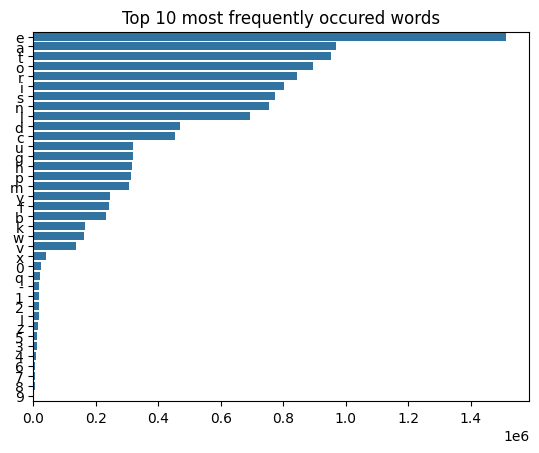

In [151]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 most frequently occured words')
plt.show()

In [152]:
##### Text similarity


In [157]:
doc_trump="Mr.Trump beacame president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_putin="Post elections, Vladimir Putin beacame president of Russia, President Putin has served as Prime Minister earlier in his political career"
doc_election="President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend"
documents=[doc_trump,doc_election,doc_putin]
print(documents)
for i in documents:
  print(i)

['Mr.Trump beacame president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin', 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend', 'Post elections, Vladimir Putin beacame president of Russia, President Putin has served as Prime Minister earlier in his political career']
Mr.Trump beacame president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin
President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend
Post elections, Vladimir Putin beacame president of Russia, President Putin has served as Prime Minister earlier in his political career


In [158]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vectorizer=CountVectorizer(stop_words='english')
count_vectorizer=CountVectorizer()
sparse_matrix=count_vectorizer.fit_transform(documents)
doc_term_matrix=sparse_matrix.todense()
df=pd.DataFrame(doc_term_matrix,columns=count_vectorizer.get_feature_names_out(),
                index=['doc_trump','doc_election','doc_putin'])
print(df)



              after  as  beacame  by  career  claimed  earlier  election  \
doc_trump         1   0        1   0       0        0        0         1   
doc_election      0   0        0   1       0        1        0         1   
doc_putin         0   1        1   0       1        0        1         0   

              elections  friend  ...  some  support  the  though  trump  \
doc_trump             0       0  ...     1        1    2       1      2   
doc_election          0       1  ...     0        0    1       0      1   
doc_putin             1       0  ...     0        0    0       0      0   

              vladimir  was  winning  witchhunt  with  
doc_trump            0    0        1          0     1  
doc_election         0    1        0          1     0  
doc_putin            1    0        0          0     0  

[3 rows x 45 columns]


In [162]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine Similarity:\n",cosine_similarity(df,df))

Cosine Similarity:
 [[1.         0.48750843 0.32475953]
 [0.48750843 1.         0.33113309]
 [0.32475953 0.33113309 1.        ]]


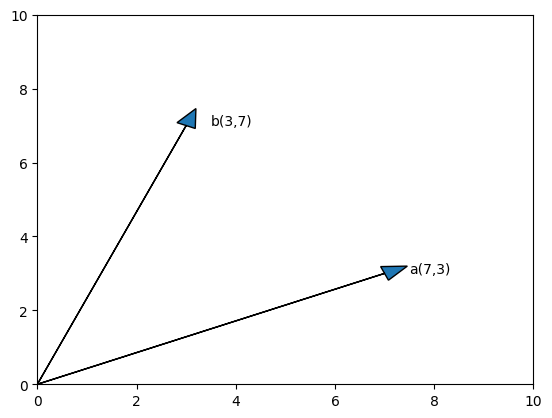

cosine similarity between a and b is: 0.7241379310344827
Cosine Distance between a and b is: 0.27586206896551735


In [163]:
from math import cos
import numpy as np
import matplotlib.pyplot as plt
a=np.array([7,3])
b=np.array([3,7])
ax=plt.axes()
ax.arrow(0.0,0.0,a[0],a[1],head_width=0.4,head_length=0.5)
plt.annotate(f"a({a[0]},{a[1]})",xy=(a[0],a[1]),xytext=(a[0]+0.5,a[1]))
ax.arrow(0.0,0.0,b[0],b[1],head_width=0.4,head_length=0.5)
plt.annotate(f"b({b[0]},{b[1]})",xy=(b[0],b[1]),xytext=(b[0]+0.5,b[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()


cos_sim=np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
print(f"cosine similarity between a and b is: {cos_sim}")
print(f"Cosine Distance between a and b is: {1-cos_sim}")